##**Sentiment Analysis**

Stanford Sentiment Treebank version 2, là một tập dữ liệu rộng lớn được sử dụng trong nghiên cứu về xử lý ngôn ngữ tự nhiên (NLP) để đánh giá cảm xúc trong văn bản. Bộ dữ liệu này là một phiên bản mở rộng và cải tiến của Stanford Sentiment Treebank gốc, bao gồm các câu từ các bộ phim được đánh giá là tích cực hoặc tiêu cực. Một đặc điểm nổi bật của bộ dữ liệu SST2 so với phiên bản gốc là nó không bao gồm các nhãn cảm xúc trung tính, tập trung chủ yếu vào việc phân loại các biểu hiện thành hai nhãn: tích cực hoặc tiêu cực.

Bộ dữ liệu này thường được sử dụng trong các nhiệm vụ như phân tích cảm xúc và máy học, cung cấp một cơ sở thực nghiệm cho các mô hình dự đoán cảm xúc của văn bản. Nó bao gồm không chỉ các câu đánh giá mà còn cả cấu trúc cây cú pháp, cho phép thực hiện phân tích tinh tế hơn trên các cấp độ khác nhau của câu, từ cụm từ đến câu hoàn chỉnh. Điều này giúp nghiên cứu và phát triển các mô hình NLP tiên tiến, có khả năng hiểu và xử lý ngữ nghĩa của văn bản một cách chi tiết hơn.

In [20]:
#!pip install transformers

**Tải các thu viện cần thiết**

In [21]:
import pandas as pd #Cung cấp cấu trúc dữ liệu như DataFrame để làm việc hiệu quả với dữ liệu có cấu trúc.
import numpy as np #Hỗ trợ các mảng đa chiều, các hàm toán học phức tạp và là nền tảng cho nhiều thư viện tính toán khác.
import matplotlib.pyplot as plt #Đồ họa, dùng để vẽ đồ thị và biểu đồ.
# Magic function trong Jupyter Notebook để hiển thị đồ thị ngay trong cửa sổ hiện tại.
%matplotlib inline
import seaborn as sns #Dựa trên matplotlib, cung cấp các chức năng để tạo ra các biểu đồ thống kê một cách dễ dàng và đẹp mắt.

#Các thư viện để xử lý từ vựng
import re #Xử lý chuỗi văn bản.
import nltk#Xử lý ngôn ngữ tự nhiên, hỗ trợ các tác vụ như phân loại, tách từ, và loại bỏ stopword.
from nltk.corpus import stopwords #Tập hợp các stopword thường dùng để loại bỏ từ không mang nhiều ý nghĩa trong văn bản.
from nltk.stem import PorterStemmer #Bộ stemming dùng để đưa từ về dạng gốc.
from nltk.tokenize import sent_tokenize, word_tokenize #Bộ stemming dùng để đưa từ về dạng gốc.
from sklearn.model_selection import train_test_split #Hàm phân chia dữ liệu thành tập huấn luyện và tập kiểm thử.

import tensorflow as tf #Thư viện học sâu, hỗ trợ xây dựng và huấn luyện mô hình học sâu.
from tensorflow import keras #API của TensorFlow cho Keras, giúp xây dựng và huấn luyện mô hình học sâu một cách dễ dàng.
from tensorflow.keras.layers import Dense, Input # Chứa các lớp dùng trong mô hình học sâu như Dense, Input.
from tensorflow.keras.optimizers import Adam #Cung cấp các bộ tối ưu hóa như Adam, dùng trong quá trình huấn luyện mô hình.
from keras.models import Model #Chứa các hàm để xây dựng mô hình học sâu.

import transformers #Thư viện cung cấp các mô hình học sâu tiên tiến như BERT, GPT, được huấn luyện sẵn trên lượng dữ liệu lớn.
from transformers import BertTokenizer, TFBertModel

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #Chứa các hàm để đánh giá mô hình

import warnings #Kiểm soát việc hiển thị cảnh báo trong Python.
warnings.filterwarnings("ignore") #Cấu hình để lọc bỏ và không hiển thị các cảnh báo

In [22]:
#!pip install datasets #Cài thư viện datasets, để sử dụng bộ dữ liệu Stanford Sentiment Treebank version 2

In [23]:
#Tải bộ dữ liệu có sẵn trong datasets
from datasets import load_dataset
dataset = load_dataset("stanfordnlp/sst2")

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [24]:
# Gộp tập train và validation, coi như là bộ dữ liệu hoàn chỉnh, sau đó bắt đầu tiến hành train test split như bình thường.
train_df = pd.DataFrame(dataset['train']) #lấy tập train
validation_df = pd.DataFrame(dataset['validation']) #lấy tập validation
df = pd.concat([train_df, validation_df], ignore_index=True) #Kết hợp 2 tập này thành một bảng, sau đó sẽ tiến hành shuffle sau.
# Xem thử 5 dòng đầu của bộ dữ liệu
df.head()

,idx,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


In [25]:
nltk.download('stopwords')#Tải về các stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**First observations:**

In [26]:
df.shape #Kiểm tra chiều dữ liệu: ta thấy có 68221 dòng, tương ứng với số reviews, và có 3 cột.

(68221, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68221 entries, 0 to 68220
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       68221 non-null  int64 
 1   sentence  68221 non-null  object
 2   label     68221 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB



## **Tiến hành chuẩn bị dữ liệu cho quá trình huấn luyện**

Remove unnecessary variables:


In [28]:
print(df["sentence"][1]) #Xem xét thử review dòng số 2


contains no wit , only labored gags 


In [29]:
# Kiểm tra dữ liệu thiếu => không có
df.isna().sum()



idx         0
sentence    0
label       0
dtype: int64

## Tiến hành EDA và trực quan hóa dữ liệu


In [30]:
df['label'].value_counts() #Xem tất cả các nhãn => có 2 nhãn, 1 cho tích cực và 0 cho tiêu cực.

label
1    38013
0    30208
Name: count, dtype: int64

In [31]:
df.describe() #Tiến hành kiểm tra thống kê mô tả

,idx,label
count,68221.000000,68221.000000
mean,33249.145893,0.557204
std,19675.026671,0.496721
min,0.000000,0.000000
25%,16183.000000,0.000000
50%,33238.000000,1.000000
75%,50293.000000,1.000000
max,67348.000000,1.000000


Rõ ràng là nhãn có sự cân bằng về số lượng positive và negative

**Phân bố dữ liệu của các nhãn**

Sử dụng biểu đồ tròn để kiểm tra:
Gần 56% là negative, và 44% bình luận trong bộ dữ liệu là positive.

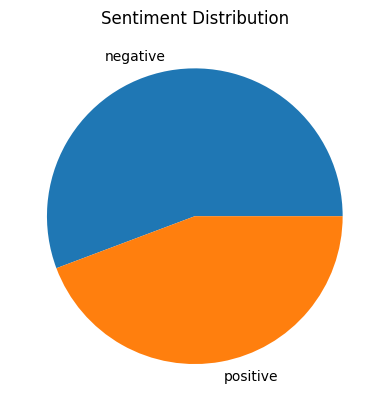

In [32]:
sms = pd.value_counts(df["label"], sort=True)
sms.plot(kind="pie", labels=["negative", "positive"])#, autopct="%1.0f%%")

plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

Kiểm tra chiều dài của các review, mục tiêu sẽ tiến hành tìm max_len để tokenize, không bị thiếu dữ liệu:

In [33]:
df['length'] = df["sentence"].apply(len)
df.head()

,idx,sentence,label,length
0,0,hide new secretions from the parental units,0,44
1,1,"contains no wit , only labored gags",0,36
2,2,that loves its characters and communicates som...,1,89
3,3,remains utterly satisfied to remain the same t...,0,56
4,4,on the worst revenge-of-the-nerds clichés the ...,0,73


Trực quan hóa chiều dài của các comments, chọn max_len là 150 khi tokenize đánh giá, là vì phần lớn các đánh giá đều có độ dài ít hơn 150 từ. Trong biểu đồ, cột tại điểm 150 không cao, cho thấy có tương đối ít đánh giá vượt quá độ dài này. Do đó, việc đặt giới hạn max_len ở 150 có thể là một sự cân nhắc giữa việc giữ lại thông tin quan trọng từ đánh giá và việc giảm bớt kích thước của dữ liệu để tiết kiệm bộ nhớ và thời gian xử lý mà không làm mất đi quá nhiều thông tin hữu ích.

Điều này giả định rằng việc cắt bớt không gây ảnh hưởng nhiều đến ý nghĩa của các đánh giá, vì hầu hết dữ liệu quan trọng có thể đã được bao gồm trong phạm vi 150 từ đầu tiên của mỗi đánh giá..

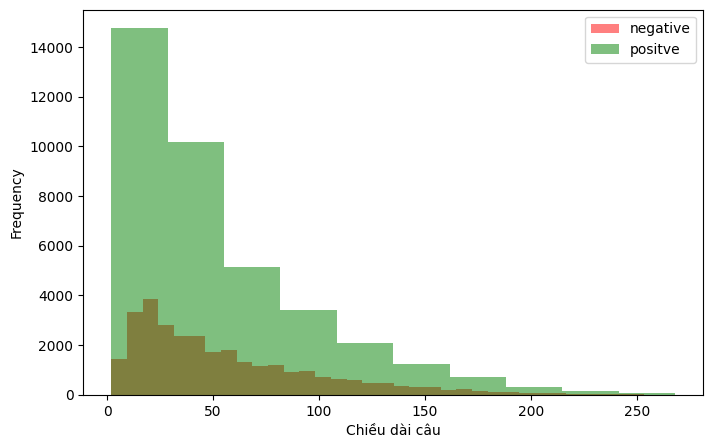

In [114]:
plt.figure(figsize=(8, 5))
df[df["label"] == 0].length.plot(bins=35, kind='hist', color='red', label='negative', alpha=0.5)
df[df["label"] == 1].length.plot(kind='hist', color='green', label='positve', alpha=0.5)
plt.legend()
plt.xlabel("Chiều dài câu");

### **Xử lý dữ liệu**

Trong bước tiếp theo, chúng ta làm sạch văn bản, loại bỏ các từ dừng và áp dụng thao tác stemming cho mỗi review.


In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
stop_words = stopwords.words('english')
print(stop_words[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [38]:
def clean_text(words):
    """Dùng để làm sạch các câu"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

def remove_stopwords(text):
    """Loại bỏ các stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def stemmer(stem_text):
    """Dùng để stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [39]:
df['sentence'] = df['sentence'].apply(clean_text) #Tiến hành apply hàm clean_text lên các câu
df['sentence'] = df['sentence'].apply(remove_stopwords) #Tiến hành apply hàm remove_stopwords lên các câu
df['sentence'] = df['sentence'].apply(stemmer) #Tiến hành apply hàm stemmer lên các câu

In [40]:
df.head() #Kiểm tra dữ liệu sau khi đã làm sạch

,idx,sentence,label,length
0,0,hide new secret parent unit,0,44
1,1,contain wit labor gag,0,36
2,2,love charact commun someth rather beauti human...,1,89
3,3,remain utterli satisfi remain throughout,0,56
4,4,worst reveng nerd clich filmmak could dredg,0,73


In [41]:
print(df['sentence'].apply(lambda x: len(x.split(' '))).sum())

355115


### **BERT model**

BERT (Bidirectional Encoder Representations from Transformers) là một mô hình ngôn ngữ dựa trên kỹ thuật Transformer, được thiết kế để hiểu ngữ cảnh hai chiều của một từ trong một câu. Điều này khác biệt với các mô hình trước đó, thường chỉ xem xét ngữ cảnh một chiều (từ trái sang phải hoặc từ phải sang trái). BERT được huấn luyện trước trên một lượng lớn văn bản ngôn ngữ tự nhiên và sau đó có thể được tinh chỉnh để thực hiện nhiều loại nhiệm vụ xử lý ngôn ngữ tự nhiên khác nhau, như phân loại văn bản, dịch tự động, trả lời câu hỏi và hiểu ý nghĩa của câu.

BERT có hai phiên bản chính là BERT Base và BERT Large, với sự khác biệt chính là số lớp (layers), số đơn vị ẩn (hidden units), và số head trong cơ chế attention, điều này quyết định kích thước và khả năng của mô hình. BERT đã đạt được những kết quả nổi bật trên nhiều bài toán xử lý ngôn ngữ tự nhiên và trở thành một trong những mô hình tiên phong cho thế hệ các mô hình ngôn ngữ dựa trên Transformer sau này như GPT, T5, và ELECTRA.

Để thực hiện token hóa các bộ dữ liệu của chúng ta, bài này ta chọn một mô hình đã được huấn luyện trước. Chúng ta tải mô hình cơ bản (bert-large-uncased) từ thư viện Huggingface Transformers.

In [42]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
tokenizer

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

PreTrainedTokenizer(name_or_path='bert-large-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Trong thư viện Transformers có sẵn nhiều mô hình BERT khác nhau. Chúng ta sử dụng mô hình TFBertModel (bert-base-uncased) từ thư viện.

In [43]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Tách dữ liệu thành bộ train và test

In [44]:
X = df['sentence']
y = df['label']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 2001) #Dùng train_test_split để tách

Hàm này có chức năng chuẩn bị dữ liệu văn bản để đưa vào mô hình BERT bằng cách thực hiện tokenization. Nó chuyển đổi văn bản thành dãy các ID token và tạo ra các attention mask. Các token này được đệm (padding) hoặc cắt bớt để có độ dài nhất định, sẽ dùng max_len là 150, đảm bảo tính nhất quán trên tất cả các câu.


In [46]:
def encode(text, maxlen):
  """Chức năng của hàm: Mã hóa văn bản để tạo input_ids và attention_masks cho mô hình BERT, với đệm hoặc cắt xén để đạt độ dài cố định."""
  input_ids=[]
  attention_masks=[]

  for row in text:
    encoded = tokenizer.encode_plus(
        row,
        add_special_tokens=True,
        max_length=maxlen,
        pad_to_max_length=True,
        return_attention_mask=True,
    )
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids),np.array(attention_masks)


Based on this  encodings for our training and testing datasets are generated as follows:

In [47]:
max_len = 150 #Đã phân tích bên trên, sẽ sử dụng max_len là 150

X_train_input_ids, X_train_attention_masks = encode(X_train.values, maxlen=max_len) # Tiến hành tokenize dữ liệu train
X_test_input_ids, X_test_attention_masks = encode(X_test.values, maxlen=max_len) # Tiến hành tokenize dữ liệu test

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


## **Dựng mô hình**
Chúng ta tạo một mô hình sử dụng mô hình BERT sau đó thêm vào hai lớp Dense kèm theo lớp Dropout.

In [48]:
#! pip uninstall -q transformers -y
#! pip install -q transformers==4.17 #Những thư viên cần thiết nếu quá trình build model bị lỗi

### Dùng pretrain của BERT

In [49]:
def build_model(bert_model):
    """Khởi tạo mô hình với BERT làm cơ sở, thêm hai lớp Dense và một lớp Dropout, compile với hàm loss là binary crossentropy.
    Thang đo để lựa ra mô hình là accuracy.Hàm này sẽ trả về một BERT model với max_len tự chọn, max_len là global variable"""
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    attention_masks = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="attention_masks")

    # Input của model là một list các tensors
    sequence_output = bert_model([input_word_ids, attention_masks])[1]

    # Thêm các lớp khác vào BERT output
    output = sequence_output
    output = tf.keras.layers.Dense(32, activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

    # Định nghĩa input và output của model
    model = tf.keras.models.Model(inputs=[input_word_ids, attention_masks], outputs=output)
    # Tiến hành compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


Tải mô hình BERT đã được huấn luyện trước (bert-base-uncased) sử dụng thư viện Hugging Face's Transformers. Mô hình này không phân biệt chữ hoa chữ thường trong quá trình xử lý.

In [50]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

model = build_model(bert_model) # Khởi Tạo model
model.summary() #Tóm tắt model

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                                  
 attention_masks (InputLaye  [(None, 150)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_word_ids[0][0]',      
 el)                         ngAndCrossAttentions(last_   40         'attention_masks[0][0]'] 

In [52]:
history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=([X_test_input_ids, X_test_attention_masks], y_test)
    )

Epoch 1/5
853/853 [==============================] - 560s 637ms/step - loss: 0.4217 - accuracy: 0.8036 - val_loss: 0.2903 - val_accuracy: 0.8868
Epoch 2/5
853/853 [==============================] - 541s 634ms/step - loss: 0.2621 - accuracy: 0.8982 - val_loss: 0.2546 - val_accuracy: 0.9066
Epoch 3/5
853/853 [==============================] - 540s 634ms/step - loss: 0.1985 - accuracy: 0.9266 - val_loss: 0.2221 - val_accuracy: 0.9218
Epoch 4/5
853/853 [==============================] - 540s 634ms/step - loss: 0.1544 - accuracy: 0.9446 - val_loss: 0.2252 - val_accuracy: 0.9254
Epoch 5/5
853/853 [==============================] - 540s 633ms/step - loss: 0.1246 - accuracy: 0.9563 - val_loss: 0.2464 - val_accuracy: 0.9253


In [71]:
#Lưu lại model
model.save('/content/drive/MyDrive/sentiment/sentiment_analysis.h5')

In [55]:
#Tiến hành đánh dá dựa vào accuray trên tập test
loss, accuracy = model.evaluate([X_test_input_ids, X_test_attention_masks], y_test)
print('Test accuracy :', accuracy)

427/427 [==============================] - 48s 113ms/step - loss: 0.2464 - accuracy: 0.9253
Test accuracy : 0.9253206253051758


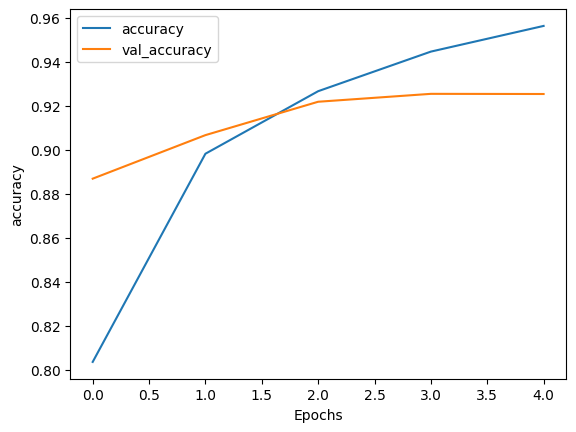

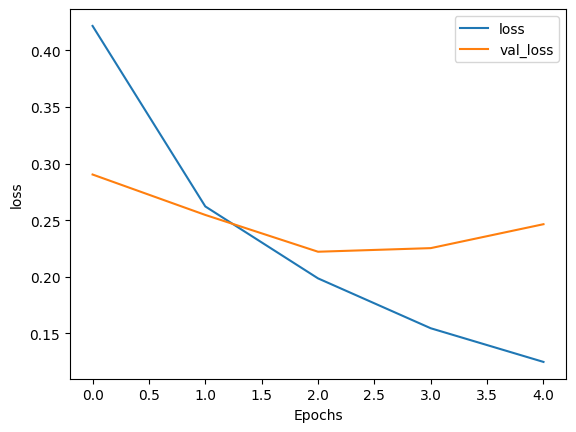

In [53]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [66]:
#from google.colab import drive
#drive.mount('/content/drive')
path = "/content/drive/MyDrive/sentiment/"

In [68]:
#!pip install joblib
from joblib import dump
dump(model, "/content/drive/MyDrive/sentiment/sentiment_model.joblib")

['/content/drive/MyDrive/sentiment/sentiment_model.joblib']

In [94]:
def preprocess_and_predict(sentence, model):
    # Tiến hành xử lý các câu cần dự đoán, y như khi tiến hành train
    cleaned_text = clean_text(sentence)
    no_stopwords_text = remove_stopwords(cleaned_text)
    stemmed_text = stemmer(no_stopwords_text)

    # Tiến hành encode
    # Trả kết quả về là input của mô hình
    input_ids, attention_mask = encode(stemmed_text, 150)

    # Tiến hành dự đoán
    prediction = model.predict([input_ids, attention_mask])[0]

    # Nếu giá trị >=0.5 câu mang ý nghĩa tích cực, ngược lại là tiêu cực
    sentiment = "Positive" if prediction[0] >= 0.5 else "Negative"
    return sentiment




In [110]:
# Ví dụ (tiếng Anh, vì bộ dữ liệu được train là tiếng Anh)
sentence_1 = "What a lovely day"
sentence_2 = "The weather is so horrible"
#Tiến hành predict
sentiment_1 = preprocess_and_predict(sentence_1, model)
sentiment_2 = preprocess_and_predict(sentence_2, model)
print(f"The predicted sentiment is:", {sentiment_1})
print(f"The predicted sentiment is:", {sentiment_2})

1/1 [==============================] - 0s 86ms/step
The predicted sentiment is: {'Positive'}
The predicted sentiment is: {'Negative'}


### **Tóm tăt**

Mô hình sử dụng pretrained BERT từ thư viện transformers, với độ chính xác của mô hình với dữ liệu sử dụng là 92.53%.
